In [12]:
import json
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key

In [15]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
city_list = []
coords_list = []
temp_list = []
humidity_list = []
cloud_list = []
wind_list = []

while len(city_list) < 500:
    lat = round(random.uniform(-90,90),2)
    lon = round(random.uniform(-180,180),2)
    query_url = url + f'lat={lat}&lon={lon}' + "&units=imperial" + '&appid=' + api_key
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if 'name' in weather_json and weather_json['name'] != 'Earth' and weather_json['name'] not in city_list and weather_json['name'] != '':
        print(f'City number {len(city_list)+1} is {weather_json["name"]}')
        city_list.append(weather_json['name'])
        coords_list.append((lat,lon))
        temp_list.append(weather_json['main']['temp'])
        humidity_list.append(weather_json['main']['humidity'])
        wind_list.append(weather_json['wind']['speed'])
        cloud_list.append(weather_json['clouds']['all'])

City number 1 is Mongoumba
City number 2 is Pocao de Pedras
City number 3 is Northwest Territories
City number 4 is Teknaf
City number 5 is Union
City number 6 is Cook
City number 7 is Mityana District
City number 8 is Boditi
City number 9 is Male
City number 10 is Itabuna
City number 11 is Raduzhnyy
City number 12 is Taunggyi
City number 13 is Al Khafji
City number 14 is Puerto Octay
City number 15 is Lakes State
City number 16 is Lucas
City number 17 is Gobolka Mudug
City number 18 is Ain el Hadjar
City number 19 is Lepsi
City number 20 is State of Manipur
City number 21 is Lime Acres
City number 22 is Zaouia Sidi Bekri
City number 23 is Jalajala
City number 24 is Beishanyanchi
City number 25 is Rawannawi Village
City number 26 is Arijejen
City number 27 is New Stuyahok
City number 28 is Aruanã
City number 29 is Blackall
City number 30 is Plains
City number 31 is Whitemud Creek
City number 32 is Holden
City number 33 is Kerema
City number 34 is Humboldt County
City number 35 is Şumay

City number 277 is Wainwright
City number 278 is Angaur State
City number 279 is Knik River
City number 280 is Attock City
City number 281 is Fort Chipewyan
City number 282 is Navonda
City number 283 is Nirji
City number 284 is El Progreso
City number 285 is Berlevåg
City number 286 is Daru
City number 287 is Vels
City number 288 is Magistralnyy
City number 289 is Skwentna
City number 290 is La Libertad
City number 291 is Préfecture du Haut-Mbomou
City number 292 is La Loche
City number 293 is Taipa
City number 294 is Maksatikha
City number 295 is Ehen Hudag
City number 296 is Kukatpalli
City number 297 is Tambawel
City number 298 is Shakawe
City number 299 is Irbeyskoye
City number 300 is Torba Province
City number 301 is Sur
City number 302 is Isafjoerdur
City number 303 is Lagoa Salgada
City number 304 is Rose Prairie
City number 305 is Ahal Welaýaty
City number 306 is Santa Ana
City number 307 is Yemetsk
City number 308 is Bokovskaya
City number 309 is Khodzha-Maston
City number 31

In [16]:
weather_df = pd.DataFrame({'City':city_list, 'Coordinates':coords_list, 'Temperature (F)':temp_list,
                          'Humidity (%)':humidity_list, 'Cloud (%)':cloud_list, 'Wind Speed (mph)':wind_list})
weather_df.head()

,City,Coordinates,Temperature (F),Humidity (%),Cloud (%),Wind Speed (mph)
0,Mongoumba,"(3.16, 18.4)",85.06,68,8,2.15
1,Pocao de Pedras,"(-4.64, -44.85)",70.61,98,36,2.37
2,Northwest Territories,"(69.35, -118.32)",-8.68,84,64,4.94
3,Teknaf,"(20.87, 92.95)",78.26,45,0,2.59
4,Union,"(-35.68, -66.13)",52.61,56,56,17.02


In [28]:
weather_df.to_csv('random_city_data.csv')

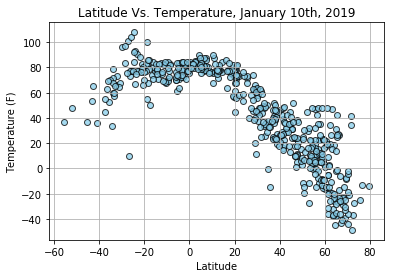

In [29]:
plt.scatter([i[0] for i in weather_df['Coordinates']], [i for i in weather_df['Temperature (F)']], marker = 'o' , facecolors = 'skyblue' , edgecolors = 'black', alpha=.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel('Temperature (F)')
plt.title("Latitude Vs. Temperature, January 10th, 2019")
plt.savefig('Images/temp_data_plot.png')
plt.show()

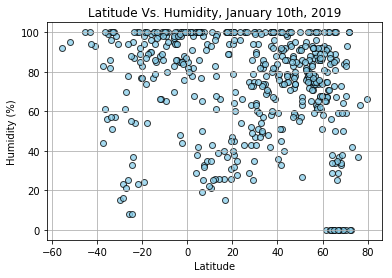

In [30]:
plt.scatter([i[0] for i in weather_df['Coordinates']], [i for i in weather_df['Humidity (%)']], marker = 'o' , facecolors = 'skyblue' , edgecolors = 'black', alpha=.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("Latitude Vs. Humidity, January 10th, 2019")
plt.savefig('Images/humidity_data_plot.png')
plt.show()

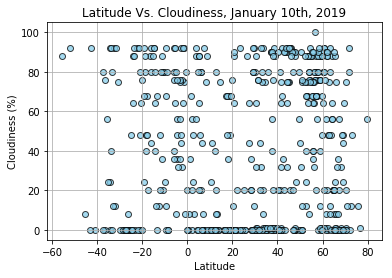

In [31]:
plt.scatter([i[0] for i in weather_df['Coordinates']], [i for i in weather_df['Cloud (%)']], marker = 'o' , facecolors = 'skyblue' , edgecolors = 'black', alpha=.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("Latitude Vs. Cloudiness, January 10th, 2019")
plt.savefig('Images/cloud_data_plot.png')
plt.show()

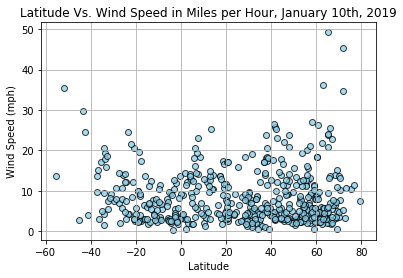

In [32]:
plt.scatter([i[0] for i in weather_df['Coordinates']], [i for i in weather_df['Wind Speed (mph)']], marker = 'o' , facecolors = 'skyblue' , edgecolors = 'black', alpha=.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude Vs. Wind Speed in Miles per Hour, January 10th, 2019")
plt.savefig('Images/wind_data_plot.png')
plt.show()

Observations:

1. Temperature peaks around the equator, which is consistant with known weather trends.
2. The random selection of cities chose more cities in the northern hemisphere, as it excluded any coordinates that did not specify a city. As there is more land in the northern hemisphere, random coordinates in the northern hemisphere are more likely to specify a city than random coordinates in the southern hemisphere.
3. Wind speed seems to be lower near the equator. However, besides a handful of outliers, wind speeds are mostly uniform. The shape of the scatter plot indicates that wind speed is affected by factors that are indirectly influenced by latitude, such as proximity to coastline.